In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import os.path as osp
from matplotlib import colors
import os
import pandas as pd
import math
import scipy.spatial.distance as dist
import itertools

## Episodes learning

The following function plots the relative duration of episodes

In [5]:
plt.style.use('fivethirtyeight')

def plot_episode(data_folder="data", save_episode=False, save_folder='runs', filename = 'episode.png'):
    """
        Plots episode duration vs episode number. 
        Pursuer learns in the episodes that are on the left with respect to the red dotted line.
        Evader learns (all together) in the episodes that are on the left with respect to the blue dotted line.
    """
    info = pd.read_csv(osp.join(data_folder,"env_info.csv"))
    #num_birds=info['num_of_birds'].item()
    episode_lenght=info['episodes_length'].item()
    df = pd.read_csv(osp.join(data_folder,"episode.csv"))
    df["NormEndTime"] = df["EndTime"] / episode_lenght
    df["mean_norm_end"] = df["NormEndTime"].rolling(1000, min_periods=5).mean()
    ax = df.plot(x="Episode", y="mean_norm_end", kind="line",  legend=False, figsize=(16,9))
    ax.set_ylabel("EndTime")
    ax.set_ylim(0,1.01)
    ax.set_title('Episode lenght',fontsize=28)
    #ax.set_title('Periodic boundary conditions', fontsize=28)
            
    if save_episode:
        fig = ax.get_figure()
        fig.savefig(osp.join(save_folder,filename))
    
    return ax

<AxesSubplot:title={'center':'Episode lenght'}, xlabel='Episode', ylabel='EndTime'>

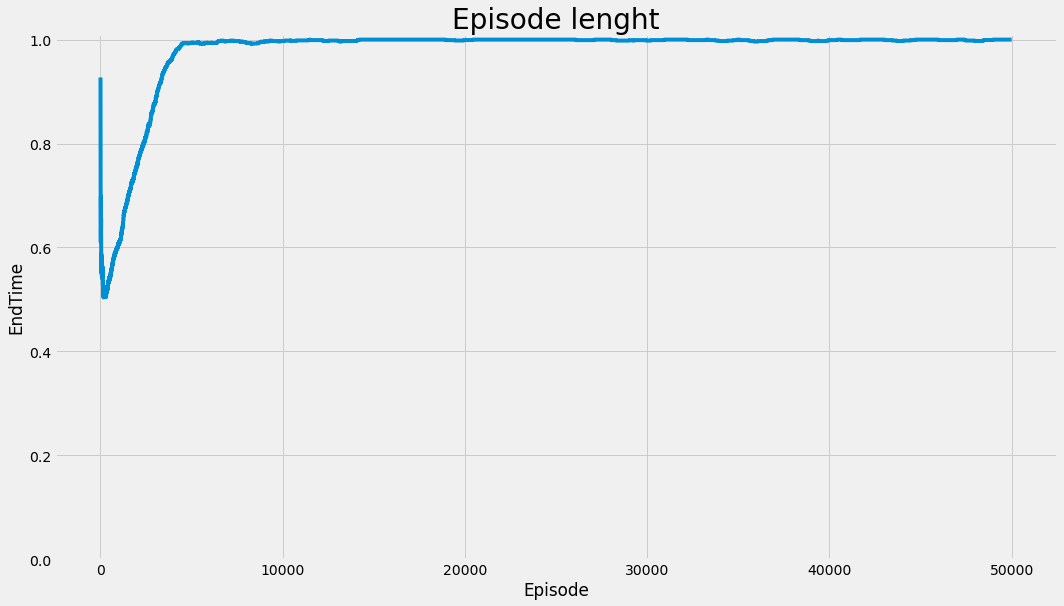

In [5]:
plot_episode(data_folder='argo_data/e1_p3_dir_data')

<AxesSubplot:title={'center':'Periodic boundary conditions'}, xlabel='Episode', ylabel='EndTime'>

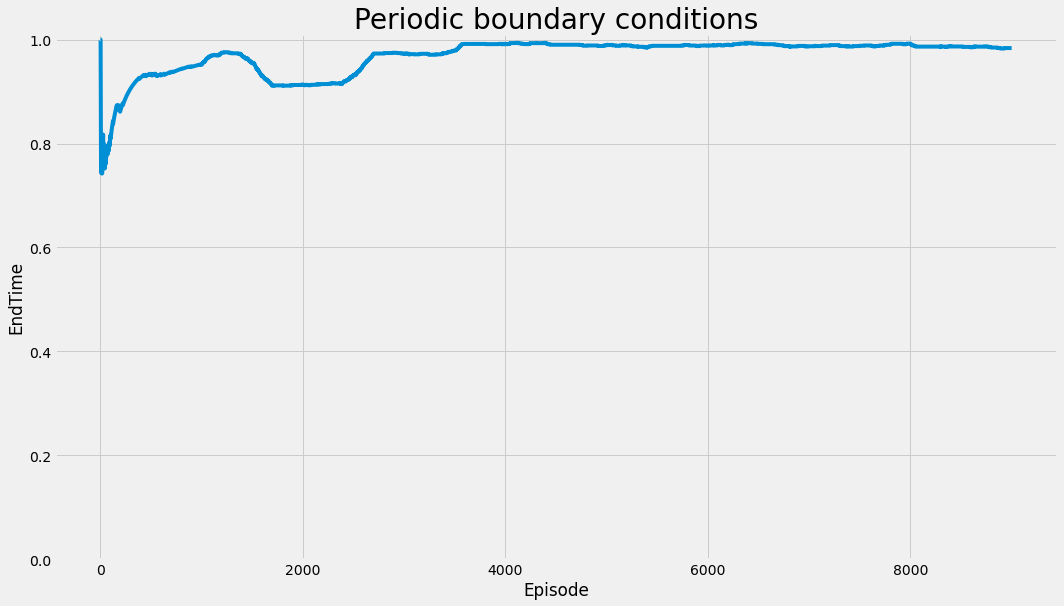

In [10]:
plot_episode(save_episode=True,save_folder='plots', filename='pbc_same_speed.png')

<AxesSubplot:title={'center':'Episode lenght'}, xlabel='Episode', ylabel='EndTime'>

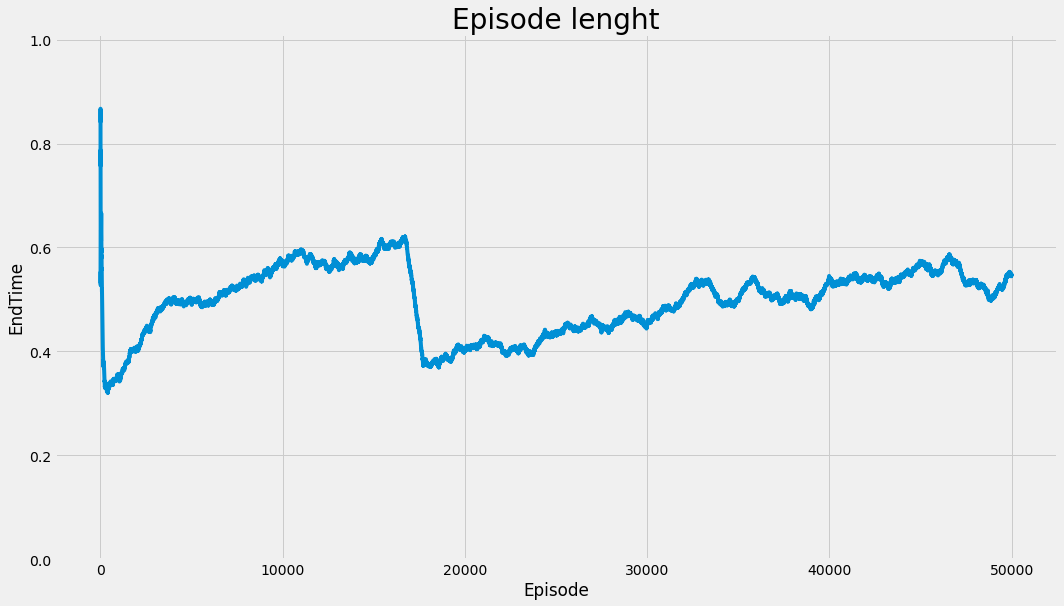

In [99]:
plot_episode(data_folder='argo_data/data')

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

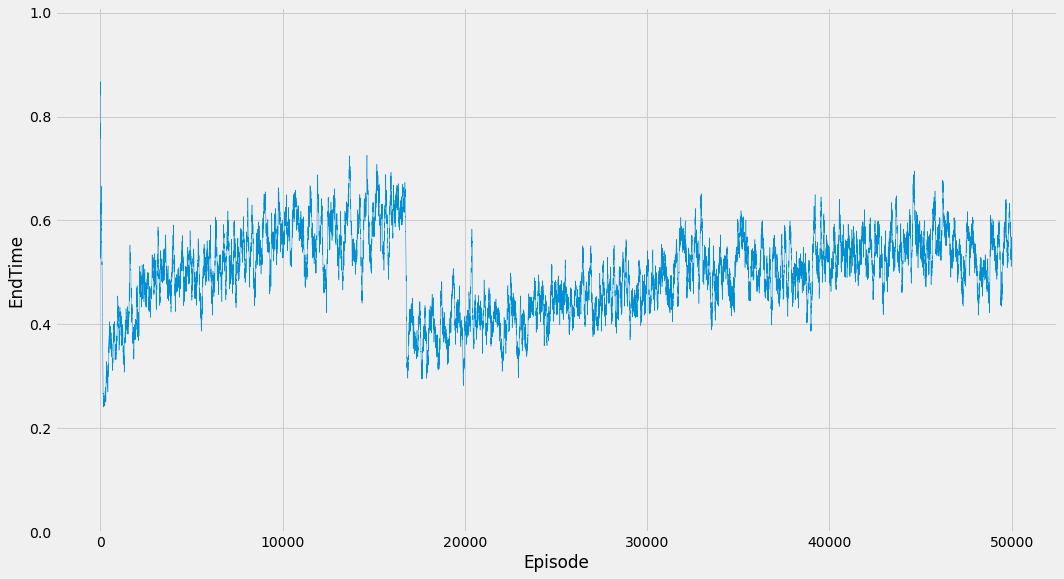

In [58]:
plot_episode(data_folder='argo_data/data', save_episode=True, save_folder='runs/3_ev_1_purs', filename = 'episode.png')

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

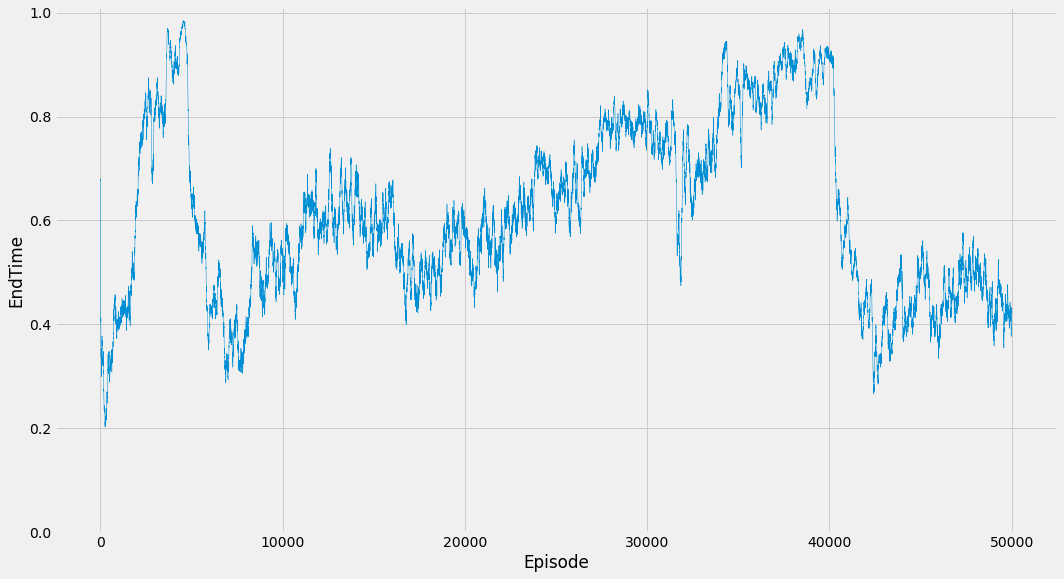

In [11]:
plot_episode(save_episode=True, save_folder='runs/15_2_10_27')

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

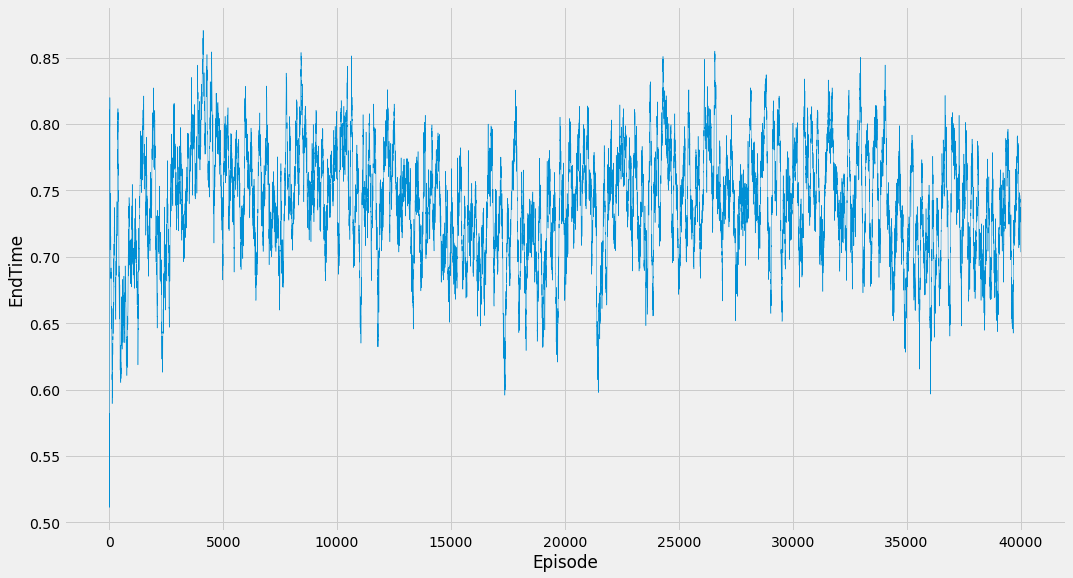

In [9]:
plot_episode(save_episode=True, save_folder='runs/neigh_impact', filename = 'episode_3_neigh.png')

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

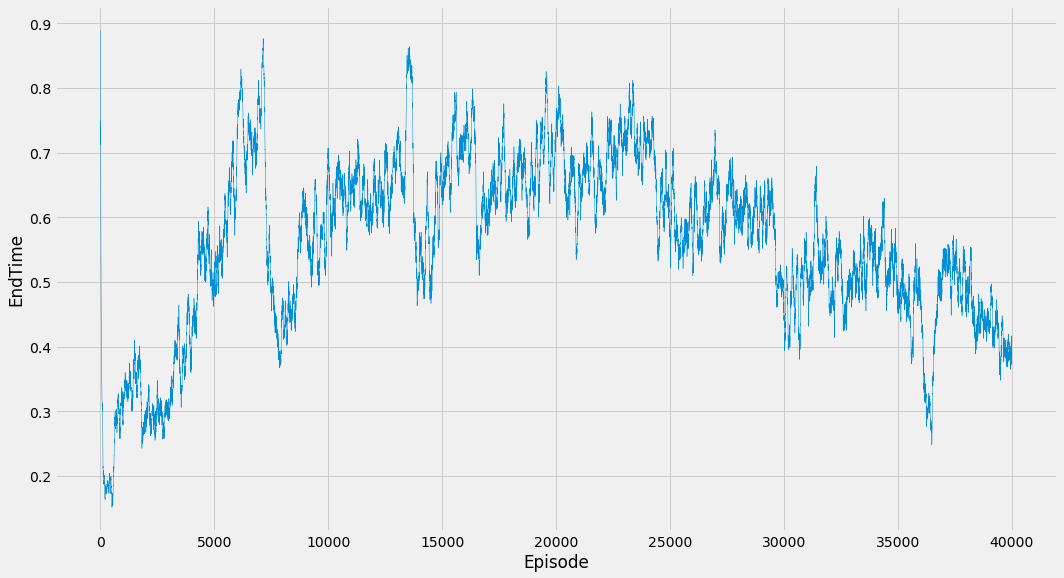

In [10]:
plot_episode(save_episode=True, save_folder='runs/neigh_impact', filename = 'episode_1_neigh.png')

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

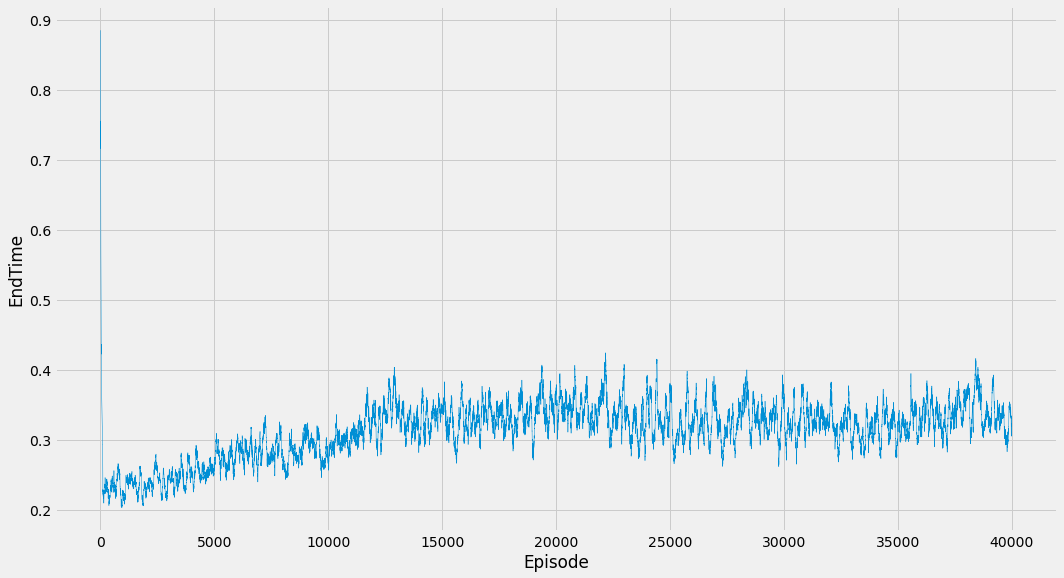

In [11]:
plot_episode(save_episode=True, save_folder='runs/neigh_impact_low_evader_vis', filename = 'episode_1_neigh.png')

<AxesSubplot:xlabel='Episode', ylabel='EndTime'>

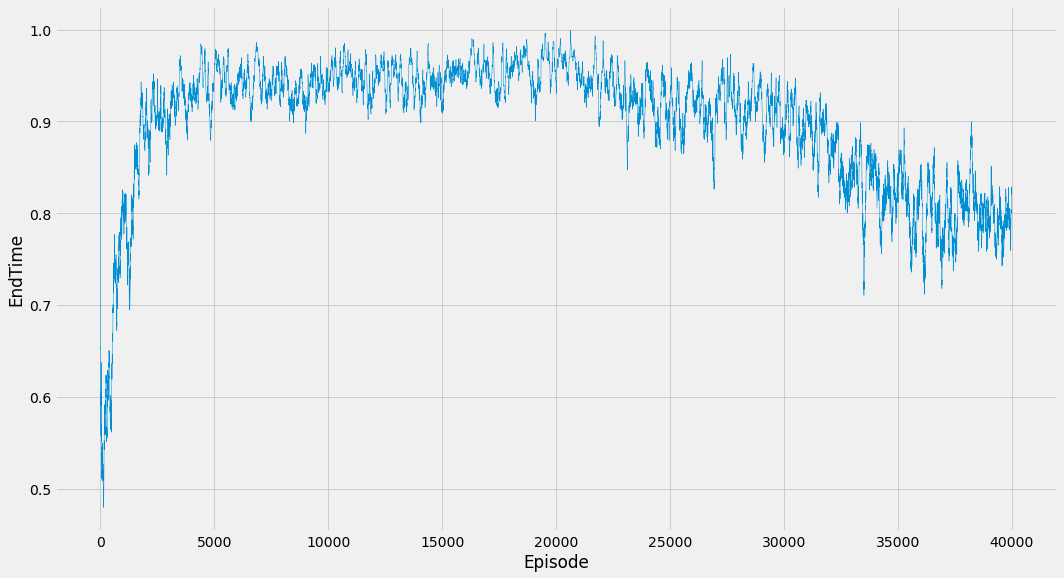

In [12]:
plot_episode(save_episode=True, save_folder='runs/neigh_impact_low_evader_vis', filename = 'episode_3_neigh.png')

## Various plots

This function plots the first instant of each episode. It is just used to produce plots to exemplify the initial distribution of the birds

In [2]:
def plot_instant(ep,time_step=[0],folder='data'):
    plt.style.use('fivethirtyeight')
    info = pd.read_csv(os.path.join(folder,'env_info.csv'))
    birds_num = info['num_of_birds'][0]
    df = pd.read_csv(os.path.join(folder,'pursuer_trajectory.csv'))
    df = df[df["Episode"] == ep]
    df.reset_index(drop=True, inplace=True)
    fig, ax = plt.subplots(1,len(time_step),figsize=(20,4))

    for k,ts in enumerate(time_step):
        x = []
        y = []
        cols = []
        for i in range(0,birds_num):
            x.append(df["x"+str(i)][ts])
            y.append(df["y"+str(i)][ts])
            if i==0:
                cols.append("red")
            else:
                cols.append("blue")
        ax[k].scatter(x,y, c=cols)
        ax[k].set_xlim((-50,50))
        ax[k].set_xlabel('x')
        ax[k].set_ylim((-50,50))
        ax[k].set_ylabel('y')
        ax[k].set_title('Time:' + str(ts))
        ax[k].label_outer()
    
    fig.suptitle('Episode: ' + str(ep),y=1.10,fontsize=28)
    fig.savefig("plots/ep_"+str(ep)+".jpg",bbox_inches='tight')

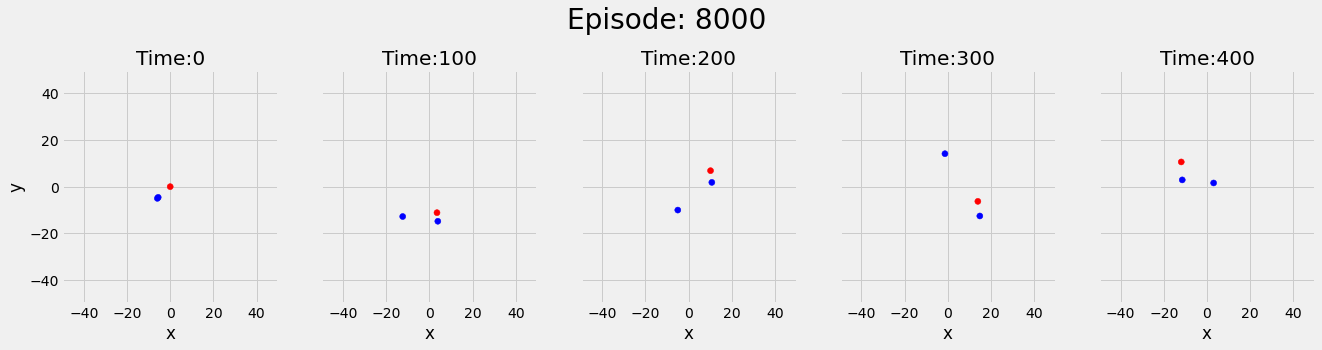

In [5]:
ts = [0,100,200,300,400]
plot_instant(8000,ts)

Text(0.5, 1.1, 'Time evolution')

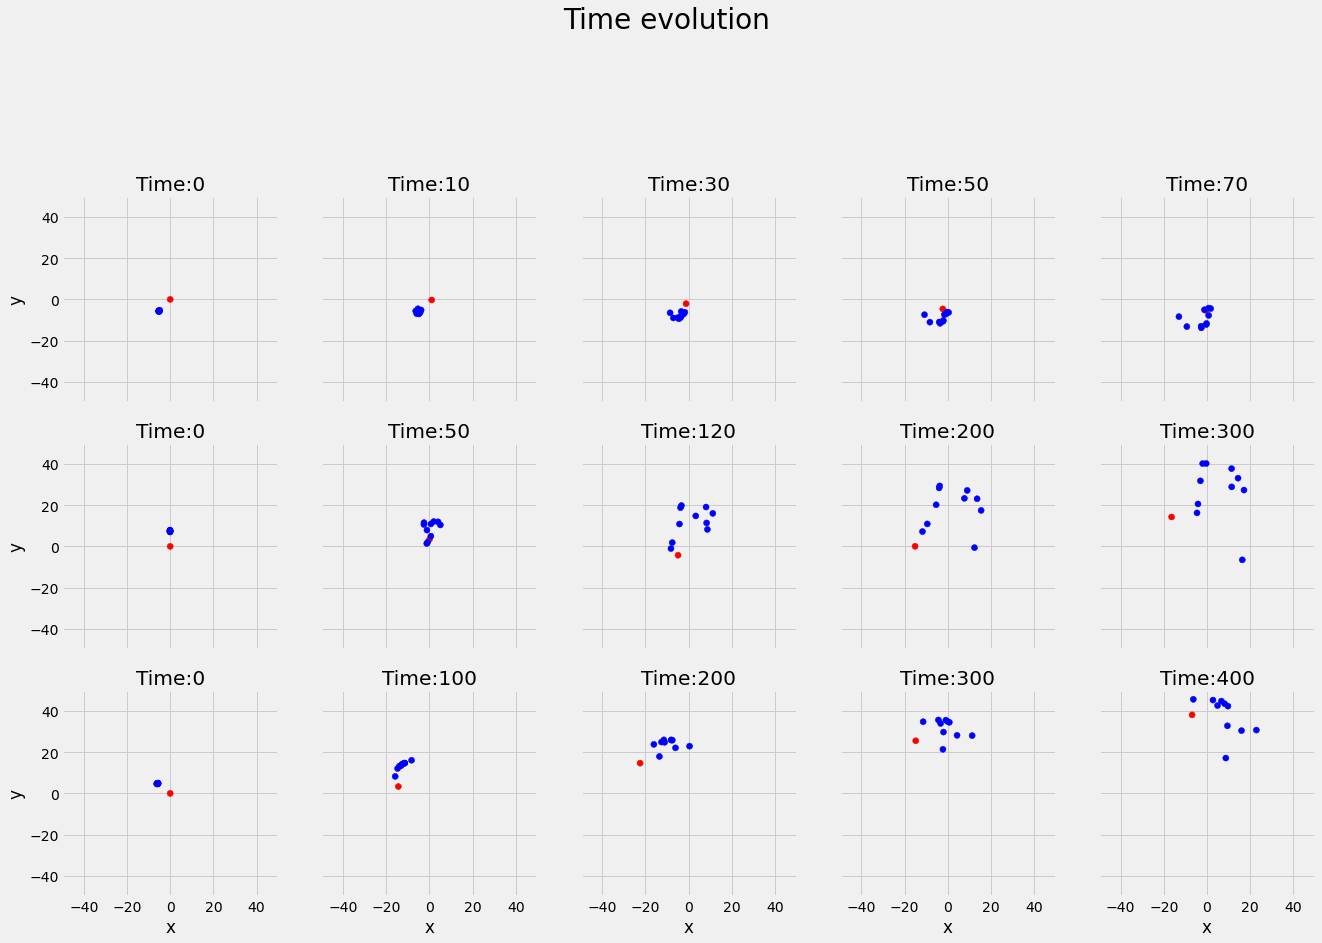

In [184]:
plt.style.use('fivethirtyeight')

folder = [folder_1,folder_2,folder_3]
eps = [42000,44000,46000]
time_steps = [[0,10,30,50,70],[0,50,120,200,300],[0,100,200,300,400]]
fig, ax = plt.subplots(3,5,figsize=(20,12))

for z, inf in enumerate(zip(folder, eps, time_steps)):
    info = pd.read_csv(os.path.join(inf[0],'env_info.csv'))
    birds_num = info['num_of_birds'][0]
    df = pd.read_csv(os.path.join(inf[0],'pursuer_trajectory.csv'))
    df = df[df["Episode"] == inf[1]]
    df.reset_index(drop=True, inplace=True)

    
    for k,ts in enumerate(inf[2]):
        x = []
        y = []
        cols = []
        for i in range(0,birds_num):
            x.append(df["x"+str(i)][ts])
            y.append(df["y"+str(i)][ts])
            if i==0:
                cols.append("red")
            else:
                cols.append("blue")
        ax[z,k].scatter(x,y, c=cols)
        ax[z,k].set_xlim((-50,50))
        ax[z,k].set_xlabel('x')
        ax[z,k].set_ylim((-50,50))
        ax[z,k].set_ylabel('y')
        ax[z,k].set_title('Time:' + str(ts))
        ax[z,k].label_outer()

fig.suptitle('Time evolution',y=1.10,fontsize=28)

In [171]:
folder = [folder_1,folder_2,folder_3]
eps = [42000,46000,46000]
time_steps = [[0,10,30,50,70],[0,30,60,90,120],[0,100,200,300,400]]

In [173]:
for i in zip(folder,eps,time_steps):
    print(i[0])

argo_data/e1_p1_data
argo_data/e3_p1_data
argo_data/e1_p3_data


### Plot $\phi$

In [13]:
#Parameters TO BE SET
folder = os.path.join('data')

<AxesSubplot:xlabel='Episode'>

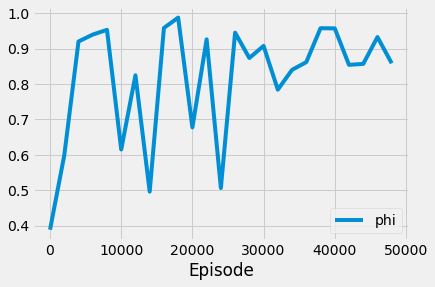

In [16]:
df = pd.read_csv(os.path.join(folder,'pursuer_trajectory.csv'))
df_info = pd.read_csv(os.path.join(folder,'env_info.csv'))
birds_num = df_info['num_of_birds'].item()
for i in range(birds_num):
    df['vx'+str(i)] = df['alpha'+str(i)].apply(lambda x: math.cos(x))
    df['vy'+str(i)] = df['alpha'+str(i)].apply(lambda x: math.sin(x))
df['vx_av'] = df[['vx'+str(i) for i in range(1,birds_num)]].mean(axis=1)
df['vy_av'] = df[['vy'+str(i) for i in range(1,birds_num)]].mean(axis=1)
df['phi'] = df.apply(lambda x: math.sqrt(x['vx_av']*x['vx_av'] + x['vy_av']*x['vy_av']), axis=1)
df[['Episode','phi']].groupby(by='Episode').mean().plot()
#df[['Episode','vx_av']].groupby(by='Episode').mean().plot()

In [17]:
df

,Episode,x0,y0,alpha0,x1,y1,alpha1,x2,y2,alpha2,...,vy7,vx8,vy8,vx9,vy9,vx10,vy10,vx_av,vy_av,phi
0,0,0.000000,0.000000,-1.759240,-2.58098,-7.49425,0.247659,-2.42842,-7.53782,-2.57532,...,-0.998237,0.350164,0.936688,0.968902,0.247447,-0.336807,-0.941574,0.276872,0.179017,0.329704
1,0,-0.028100,-0.147345,-1.759240,-2.46101,-7.49146,0.023259,-2.51283,-7.62312,-2.35092,...,-0.960000,0.350164,0.936688,0.968902,0.247447,-0.336807,-0.941574,0.295257,0.124733,0.320523
2,0,-0.056200,-0.294689,-1.759240,-2.34104,-7.48867,0.023259,-2.57613,-7.72506,-2.12652,...,-0.960000,0.549815,0.835286,0.889547,0.456843,-0.118842,-0.992913,0.381544,0.077856,0.389407
3,0,-0.045206,-0.444286,-1.497440,-2.22470,-7.45925,0.247659,-2.66054,-7.81036,-2.35092,...,-0.960000,0.549815,0.835286,0.889547,0.456843,0.105082,-0.994464,0.414979,0.089797,0.424583
4,0,-0.073306,-0.591630,-1.759240,-2.10836,-7.42983,0.247659,-2.76181,-7.87474,-2.57532,...,-0.998237,0.549815,0.835286,0.968902,0.247447,0.105082,-0.994464,0.402595,0.064677,0.407757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11978,48000,29.459900,-21.078800,-1.179720,-19.27800,-28.51250,-2.970700,-7.36117,-48.16290,-2.11670,...,-0.771123,-0.751573,-0.659650,-0.484449,-0.874819,0.189808,-0.981821,-0.432237,-0.632650,0.766209
11979,48000,29.551100,-21.198000,-0.917918,-19.39630,-28.53290,-2.970700,-7.39909,-48.27670,-1.89230,...,-0.771123,-0.751573,-0.659650,-0.484449,-0.874819,0.189808,-0.981821,-0.409392,-0.619811,0.742810
11980,48000,29.608200,-21.336700,-1.179720,-19.51460,-28.55330,-2.970700,-7.41073,-48.39620,-1.66790,...,-0.771123,-0.751573,-0.659650,-0.484449,-0.874819,0.189808,-0.981821,-0.390014,-0.646713,0.755214
11981,48000,29.699400,-21.455800,-0.917918,-19.63280,-28.57380,-2.970700,-7.42236,-48.51560,-1.66790,...,-0.771123,-0.751573,-0.659650,-0.484449,-0.874819,0.189808,-0.981821,-0.387488,-0.624463,0.734916


## Local phi measures

In [81]:
folder = 'argo_data/data'
filename = 'pursuer_trajectory.csv'
ord_param_save_fold = 'runs/3_ev_1_purs'

In [82]:
df = pd.read_csv(os.path.join(folder,filename))
df_info = pd.read_csv(os.path.join(folder,'env_info.csv'))
num_of_birds = df_info['num_of_birds'].item()
df_pos_x = df[['x'+str(i) for i in range(num_of_birds)]]
df_pos_y = df[['y'+str(i) for i in range(num_of_birds)]]
df_pos = df_pos_x.join(df_pos_y)
df_pos['Episode'] = df['Episode']
x_cols = ['x'+str(i) for i in range(num_of_birds)]
y_cols = ['y'+str(i) for i in range(num_of_birds)]
new_cols = [x for x in itertools.chain.from_iterable(itertools.zip_longest(x_cols,y_cols))]
df_pos = df_pos[['Episode', *new_cols]]
episode_vals = df_pos['Episode'].unique()
bird_dist = []

for j,ep in enumerate(episode_vals):
    tmp = df_pos[df_pos['Episode'] == ep][new_cols].to_numpy().reshape(-1,num_of_birds,2)
    for k,i in enumerate(tmp):
        bird_dist.append(dist.squareform(dist.pdist(i[1:])))
    
df['bird_dist'] = bird_dist
angle_cols = ['alpha'+str(i) for i in range(1, num_of_birds)]
f = lambda u,v: (u-v)%(2*math.pi)
df['bird_theta'] = df[angle_cols].apply(lambda x: dist.squareform(dist.pdist(x.to_numpy().reshape(-1,1),f)), axis=1)
df['bird_theta'] = df['bird_theta'].apply(lambda x: np.cos(x))
def foo(x):
    tmp_th = x['bird_theta']
    tmp_dist = x['bird_dist']

    num = 0
    den = 0

    for i in range(0,tmp_th.shape[0]):
        for j in range(i+1,tmp_th.shape[1]):
            num += tmp_th[i,j]/tmp_dist[i,j]
            den += 1/tmp_dist[i,j]
        
    return num/den
phi_loc = df.apply(foo,axis=1)
tmp = df_pos[df_pos['Episode'] == ep][new_cols].to_numpy().reshape(-1,num_of_birds,2)
df['phi_loc'] = phi_loc
phi_loc_mean = df[['Episode','phi_loc']].groupby(by='Episode').mean()
phi_loc_rolling_mean = phi_loc_mean.rolling(10,closed='both').mean(min_periods=1)


Text(0.5, 1.0, 'Order parameter evolution')

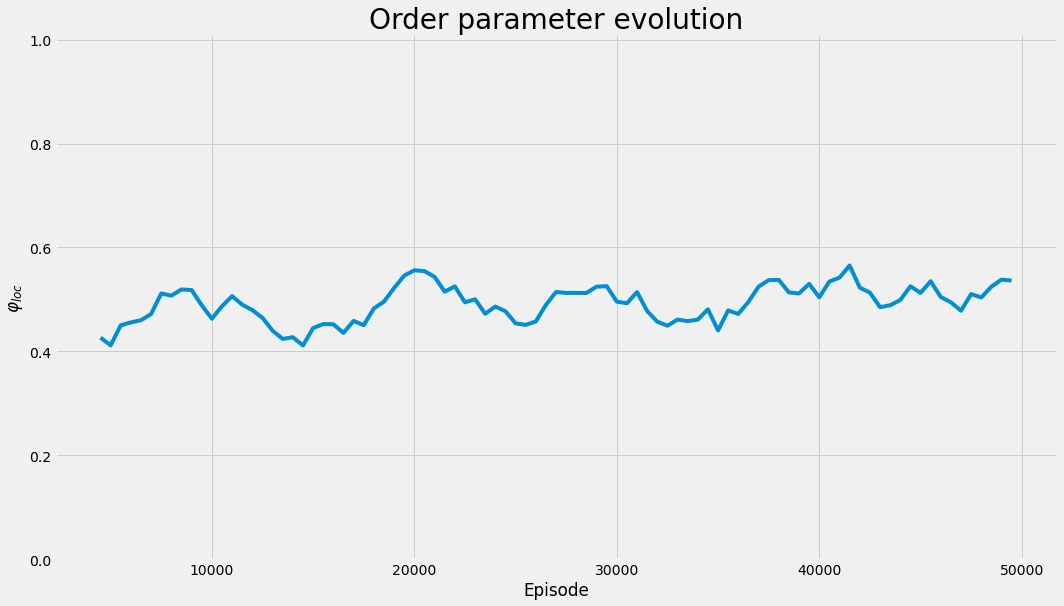

In [115]:
plt.figure(figsize=(16,9))
plt.plot(phi_loc_rolling_mean)
plt.ylim(0,1.01)
plt.ylabel(r'$\varphi_{loc}$')
plt.xlabel('Episode')
plt.title('Order parameter evolution',fontsize=28)


## Multiple episodes together

In [2]:
# folder_1 = 'argo_data/e1_p1_data'
# folder_2 = 'argo_data/e3_p1_data'
# folder_3 = 'argo_data/e1_p3_data'
folder_1 = 'argo_data/e1_p1_dir_data'
folder_2 = 'argo_data/e3_p1_dir_data'
folder_3 = 'argo_data/e1_p3_dir_data'

In [3]:
info = pd.read_csv(osp.join(folder_1,"env_info.csv"))
episode_lenght=info['episodes_length'].item()
df_1 = pd.read_csv(osp.join(folder_1,"episode.csv"))
df_1["NormEndTime"] = df_1["EndTime"] / episode_lenght
df_1["mean_norm_end"] = df_1["NormEndTime"].rolling(1000, min_periods=5).mean()

info = pd.read_csv(osp.join(folder_2,"env_info.csv"))
episode_lenght=info['episodes_length'].item()
df_2 = pd.read_csv(osp.join(folder_2,"episode.csv"))
df_2["NormEndTime"] = df_2["EndTime"] / episode_lenght
df_2["mean_norm_end"] = df_2["NormEndTime"].rolling(1000, min_periods=5).mean()

info = pd.read_csv(osp.join(folder_3,"env_info.csv"))
episode_lenght=info['episodes_length'].item()
df_3 = pd.read_csv(osp.join(folder_3,"episode.csv"))
df_3["NormEndTime"] = df_3["EndTime"] / episode_lenght
df_3["mean_norm_end"] = df_3["NormEndTime"].rolling(1000, min_periods=5).mean()

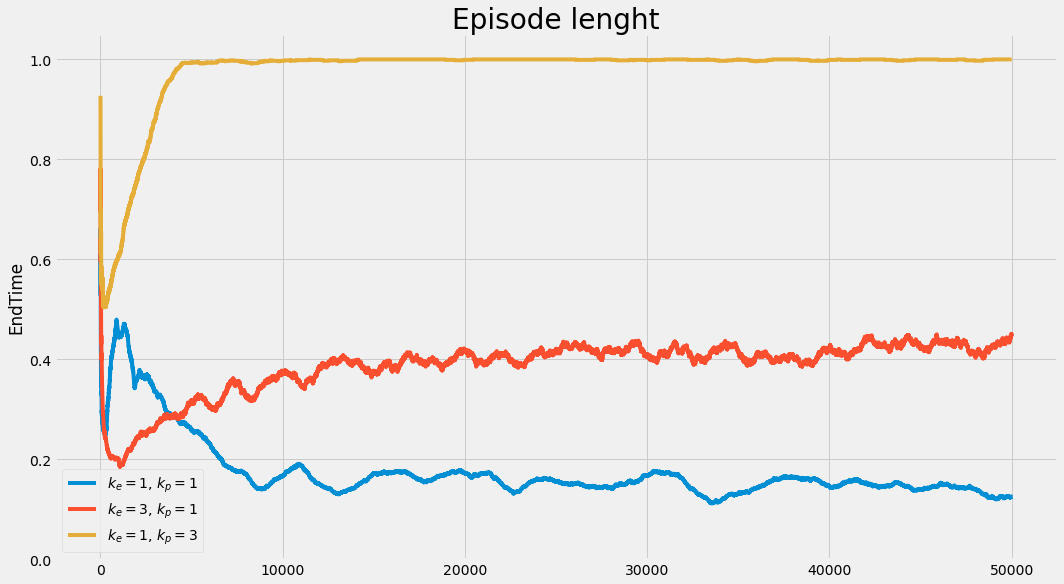

In [6]:
plt.figure(figsize=(16,9))
plt.plot(df_1['Episode'],df_1['mean_norm_end'])
plt.plot(df_2['Episode'],df_2['mean_norm_end'])
plt.plot(df_3['Episode'],df_3['mean_norm_end'])
#ax = df_1.plot(x="Episode", y="mean_norm_end", kind="line",  legend=False, figsize=(16,9))
plt.ylabel("EndTime")
plt.ylim(0,1.05)
plt.title('Episode lenght',fontsize=28)
#TODO: legend needs to be modified before plotting 
plt.legend([r'$k_e=1$, $k_p=1$',r'$k_e=3$, $k_p=1$',r'$k_e=1$, $k_p=3$'])
#plt.savefig(os.path.join(ord_param_save_fold,'order_parameter.jpg'),bbox_inches='tight')

## Multiple order params together

In [7]:
def order_params(folder, filename = 'pursuer_trajectory.csv'):
    df = pd.read_csv(os.path.join(folder,filename))
    df_info = pd.read_csv(os.path.join(folder,'env_info.csv'))
    num_of_birds = df_info['num_of_birds'].item()
    df_pos_x = df[['x'+str(i) for i in range(num_of_birds)]]
    df_pos_y = df[['y'+str(i) for i in range(num_of_birds)]]
    df_pos = df_pos_x.join(df_pos_y)
    df_pos['Episode'] = df['Episode']
    x_cols = ['x'+str(i) for i in range(num_of_birds)]
    y_cols = ['y'+str(i) for i in range(num_of_birds)]
    new_cols = [x for x in itertools.chain.from_iterable(itertools.zip_longest(x_cols,y_cols))]
    df_pos = df_pos[['Episode', *new_cols]]
    episode_vals = df_pos['Episode'].unique()
    bird_dist = []

    for j,ep in enumerate(episode_vals):
        tmp = df_pos[df_pos['Episode'] == ep][new_cols].to_numpy().reshape(-1,num_of_birds,2)
        for k,i in enumerate(tmp):
            bird_dist.append(dist.squareform(dist.pdist(i[1:])))
        
    df['bird_dist'] = bird_dist
    angle_cols = ['alpha'+str(i) for i in range(1, num_of_birds)]
    f = lambda u,v: (u-v)%(2*math.pi)
    df['bird_theta'] = df[angle_cols].apply(lambda x: dist.squareform(dist.pdist(x.to_numpy().reshape(-1,1),f)), axis=1)
    df['bird_theta'] = df['bird_theta'].apply(lambda x: np.cos(x))
    def foo(x):
        tmp_th = x['bird_theta']
        tmp_dist = x['bird_dist']

        num = 0
        den = 0

        for i in range(0,tmp_th.shape[0]):
            for j in range(i+1,tmp_th.shape[1]):
                num += tmp_th[i,j]/tmp_dist[i,j]
                den += 1/tmp_dist[i,j]
            
        return num/den
    phi_loc = df.apply(foo,axis=1)
    tmp = df_pos[df_pos['Episode'] == ep][new_cols].to_numpy().reshape(-1,num_of_birds,2)
    df['phi_loc'] = phi_loc
    phi_loc_mean = df[['Episode','phi_loc']].groupby(by='Episode').mean()
    phi_loc_rolling_mean = phi_loc_mean.rolling(10,closed='both').mean(min_periods=1)
    return (phi_loc_mean,phi_loc_rolling_mean)


In [8]:
phi_1, phi_mean_1 = order_params(folder_1)
phi_2, phi_mean_2 = order_params(folder_2)
phi_3, phi_mean_3 = order_params(folder_3)

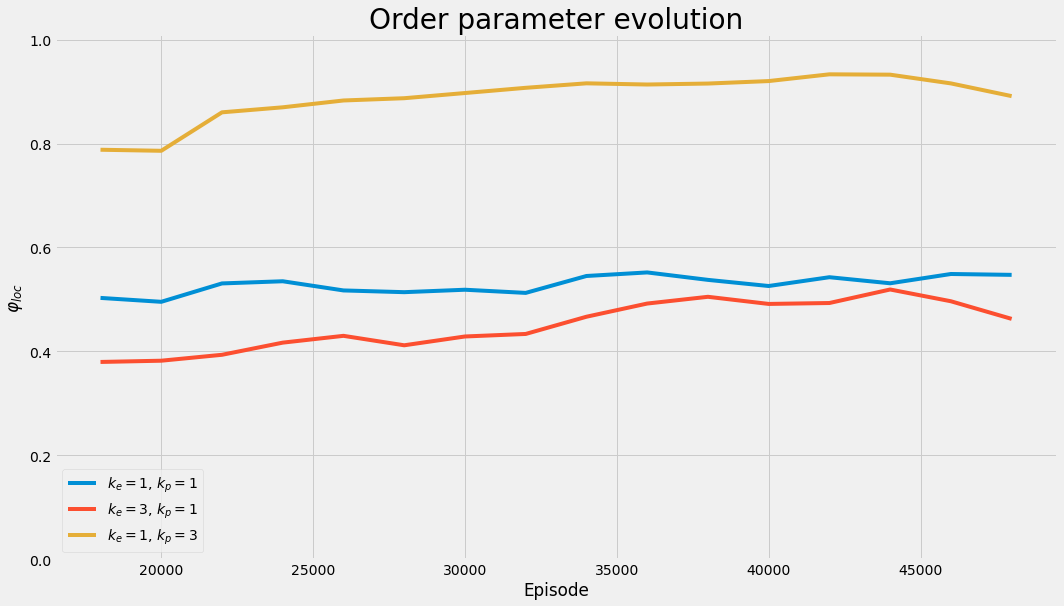

In [9]:
plt.figure(figsize=(16,9))
plt.plot(phi_mean_1)
plt.plot(phi_mean_2)
plt.plot(phi_mean_3)
plt.ylim(0,1.01)
plt.ylabel(r'$\varphi_{loc}$')
plt.xlabel('Episode')
plt.title('Order parameter evolution',fontsize=28)
#TODO: legend needs to be modified before plotting 
plt.legend([r'$k_e=1$, $k_p=1$',r'$k_e=3$, $k_p=1$',r'$k_e=1$, $k_p=3$'])

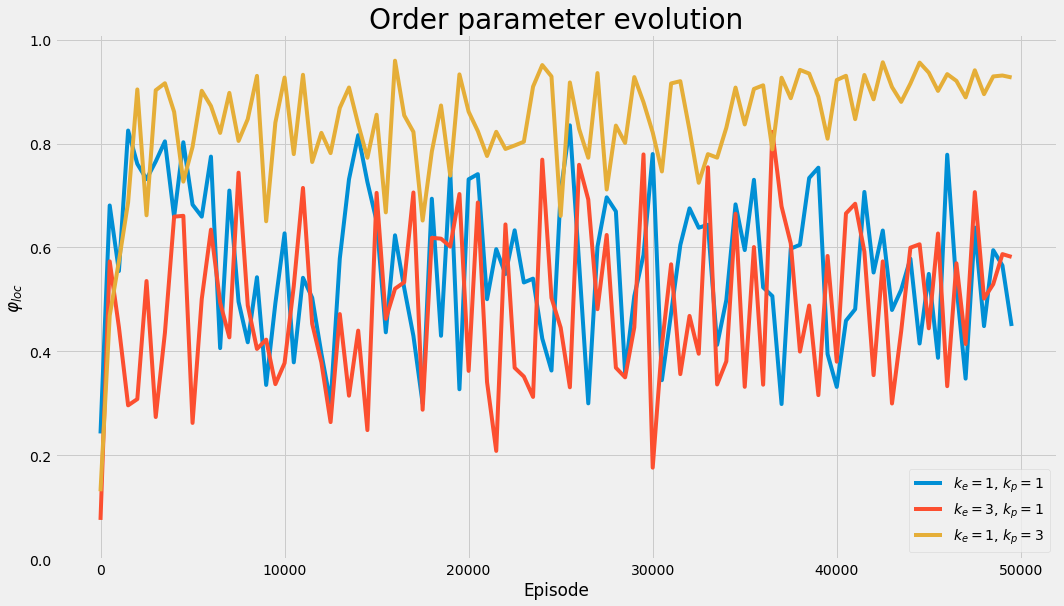

In [149]:
plt.figure(figsize=(16,9))
plt.plot(phi_1)
plt.plot(phi_2)
plt.plot(phi_3)
plt.ylim(0,1.01)
plt.ylabel(r'$\varphi_{loc}$')
plt.xlabel('Episode')
plt.title('Order parameter evolution',fontsize=28)
#TODO: legend needs to be modified before plotting 
plt.legend([r'$k_e=1$, $k_p=1$',r'$k_e=3$, $k_p=1$',r'$k_e=1$, $k_p=3$'])

## Plots to explain local $\phi$

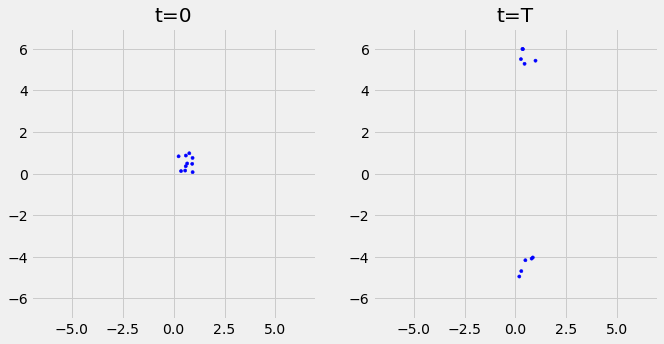

In [29]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1,2,figsize=(10,5))

x_0 = np.random.rand(1,10)
y_0 = np.random.rand(1,10)

x_1 = np.random.rand(1,10)
y_1 = np.concatenate((5+np.random.rand(1,5), -5+np.random.rand(1,5)))

cols = ['blue' for i in range(10)]

ax[0].scatter(x_0,y_0, c=cols, s=10)
ax[0].set_xlim(-7,7)
ax[0].set_ylim(-7,7)
ax[0].set_title('t=0')

ax[1].scatter(x_1,y_1, c=cols, s=10)
ax[1].set_xlim(-7,7)
ax[1].set_ylim(-7,7)
ax[1].set_title('t=T')

# for k,ts in enumerate(time_step):
#     x = []
#     y = []
#     cols = []
#     for i in range(0,birds_num):
#         x.append(df["x"+str(i)][ts])
#         y.append(df["y"+str(i)][ts])
#         if i==0:
#             cols.append("red")
#         else:
#             cols.append("blue")
#     ax[k].scatter(x,y, c=cols)
#     ax[k].set_xlim((-50,50))
#     ax[k].set_xlabel('x')
#     ax[k].set_ylim((-50,50))
#     ax[k].set_ylabel('y')
#     ax[k].set_title('Time:' + str(ts))
#     ax[k].label_outer()

#fig.suptitle('',fontsize=28)
fig.savefig("loc_phi.jpg",bbox_inches='tight')

In [11]:
x_0 = np.random.rand(1,10)
y_0 = np.random.rand(1,10)

x_1 = np.random.rand(1,10)
y_1 = np.concatenate((5+np.random.rand(1,5), -5+np.random.rand(1,5)))

In [12]:
y_1

array([[ 5.70648887,  5.29024712,  5.44542491,  5.36642206,  5.34563806],
       [-4.62071831, -4.02428466, -4.31719199, -4.22062981, -4.03472013]])